# This notebook creates and tests a decsion tree that can take an array of attributes and predict whether a machine with those attributes will be High use or Low use.

### High use is further defined as usage > 21% per hour overall, which was above the third quartile for our test data.

In [95]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import gzip
import pickle
import scipy as sp

In [96]:
with gzip.open(r'../data/LibData.pkl.gz') as f:
    utilization = pickle.load(f)

What the attribute data looks like:

In [97]:
attData = pd.read_csv(r'../data/computerAttributes.csv',header=0)

# Index based on computer name, not dbID
attData.index = attData['computerName']
attData.head()

,dbID,computerName,requiresLogon,isDesktop,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea
computerName,,,,,,,,,,,,,,
BL001,187,BL001,1,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0
BL002,188,BL002,1,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0
CITI001,105,CITI001,1,1,1,CITI Lab,1,1,1.0,0.0,1.0,0.0,0.0,0.0
CITI002,106,CITI002,1,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0
CITI003,107,CITI003,1,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0


# Testing the last 3 years (Fall 14 - Spring 17)

In [98]:
#Split into semesters


fall14 = utilization[(utilization.index >= '2014-08-18') & (utilization.index < '2014-12-12')]
spring15 = utilization[(utilization.index >= '2015-01-12') & (utilization.index < '2015-05-06')]
summer15 = utilization[(utilization.index >= '2015-05-11') & (utilization.index < '2015-08-03')]
fall15 = utilization[(utilization.index >= '2015-08-17') & (utilization.index < '2015-12-11')]
spring16 = utilization[(utilization.index >= '2016-01-11') & (utilization.index < '2016-05-04')]
summer16 = utilization[(utilization.index >= '2016-05-09') & (utilization.index < '2016-08-05')]
fall16 = utilization[(utilization.index >= '2016-08-22') & (utilization.index < '2016-12-16')]
spring17 = utilization[(utilization.index >= '2017-01-17') & (utilization.index < '2017-05-10')]
summer17 = utilization[(utilization.index >= '2017-05-15') & (utilization.index < '2017-08-07')]

In [99]:
semesters3 = [fall14, spring15, summer15, fall15, spring16, summer16, fall16, spring17, summer17]
semesters1 = [spring16, summer16, fall16, spring17, summer17]

In [100]:


utilization2 = pd.concat(semesters3)
utilization4 = utilization2.mean()

# Adding a column to look at average utilization
attData['utilizationMean'] = utilization4.values

In [101]:
# Only want the machines that require a logon, are desktops, and have a location
attData1 = attData[attData['requiresLogon'] != 0]
attData2 = attData1[attData1['isDesktop'] != 0]
attData1[attData1['location'] == 'na']

,dbID,computerName,requiresLogon,isDesktop,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea,utilizationMean
computerName,,,,,,,,,,,,,,,
LIBFALL17,377,LIBFALL17,1,1,1,na,0,na,0.0,0.0,0.0,0.0,0.0,0.0,0.00422


In [102]:
attData1 = attData1[attData1['computerName'] != 'LIBFALL17']
attData2 = attData2[attData2['computerName'] != 'LIBFALL17']

## What are the quantiles for our test data computer usage?

In [103]:
dataM = attData1['utilizationMean']

five_num = [dataM.quantile(0),   
            dataM.quantile(0.25),
            dataM.quantile(0.50),
            dataM.quantile(0.75),
            dataM.quantile(1)]

High = dataM.quantile(0.75)

five_num

[0.0,
 0.08493502441884679,
 0.1404871901087596,
 0.20230540246239964,
 0.5225797298647847]

In [104]:
dataM2 = attData2['utilizationMean']

five_num2 = [dataM2.quantile(0),   
            dataM2.quantile(0.25),
            dataM2.quantile(0.50),
            dataM2.quantile(0.75),
            dataM2.quantile(1)]

High2 = dataM2.quantile(0.75)

five_num2

[0.0,
 0.09190119685724088,
 0.14035350941847946,
 0.20558590114271047,
 0.5225797298647847]

In [105]:
# .25 - .3 gives Accuracy Score of 88% - 90% !!!!!!
#attData1['Label'] = attData1['utilizationMean'].map(lambda x: "Low" if x < .28 else "High")

# gives Accuracy Score of 71% - 72%
attData1['Label'] = attData1['utilizationMean'].map(lambda x: "Low" if x < High else "High")
#attData1.head()

In [106]:
attData2['Label'] = attData2['utilizationMean'].map(lambda x: "Low" if x < High2 else "High")
#attData2.head()

Drop any rows that have null values

In [107]:
attData1 = attData1.dropna() 
attData2 = attData2.dropna() 

In [108]:
attData1.iloc[:, [3,4,5,6,7,8,9,10,11,12,13]].head()

,isDesktop,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea
computerName,,,,,,,,,,,
BL001,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0
BL002,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0
CITI001,1,1,CITI Lab,1,1,1.0,0.0,1.0,0.0,0.0,0.0
CITI002,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0
CITI003,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0


A few ways to view the data

In [109]:
attData1.iloc[:, [15]].head()

,Label
computerName,
BL001,Low
BL002,Low
CITI001,Low
CITI002,Low
CITI003,Low


In [110]:
#attData1.dtypes

In [111]:
#attData2.dtypes

In [112]:
attData1.location.unique()

array(['Tower', 'CITI Lab', 'Reading Room', 'DMC', 'Info Commons',
       'Checkout Desk', 'Music Library', 'RIS'], dtype=object)

In [113]:
attData2.location.unique()

array(['Tower', 'CITI Lab', 'Reading Room', 'DMC', 'Info Commons',
       'Music Library', 'RIS'], dtype=object)

## Change location from a string to an int for easier use

In [114]:
# Map Location to int

locationMap = {'Tower':1, 'CITI Lab':2, 'Reading Room':3, 'DMC':4, 'Info Commons':5, 'Checkout Desk':6, 'Music Library':7, 'RIS':8}

attData1['location'] = attData1['location'].map(lambda x: locationMap.get(x) if x in locationMap else x)

In [115]:
# Map Location to int

#locationMap = {'Tower':1, 'CITI Lab':2, 'Reading Room':3, 'DMC':4, 'Info Commons':5, 'Checkout Desk':6, 'Music Library':7, 'RIS':8}

attData2['location'] = attData2['location'].map(lambda x: locationMap.get(x) if x in locationMap else x)

In [116]:
#attData1.head()

In [117]:
#attData2.head()

Some checks, should be true

In [118]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(attData1['floor'])

False

In [119]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(attData2['floor'])

False

That didn't work as expected. What do our floors look like?

In [120]:
attData1.floor.unique()

array(['0', '1', 'na', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [121]:
attData2.floor.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [122]:
attData1[attData1['floor'] == 'na'].shape

(66, 16)

In [123]:
# Give 'na' a value of 20 
# Convert column to int

attData1['floor'] = attData1['floor'].replace('na', 20)


In [124]:
attData1['floor'] = attData1['floor'].astype(int)

In [125]:
attData2['floor'] = attData2['floor'].astype(int)

In [126]:
attData1.floor.unique()

array([ 0,  1, 20,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [127]:
attData2.floor.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [128]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(attData1['floor'])

True

In [129]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(attData2['floor'])

True

In [130]:
#attData1.dtypes

In [131]:
#attData2.dtypes

### Ok, the checks have passed. Let's look at a graph to see what we are working with

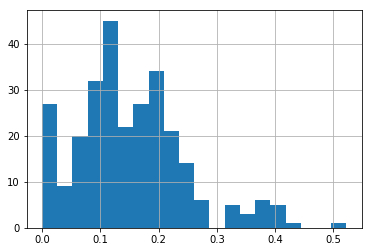

In [55]:
attData1.utilizationMean.hist(bins=20)
plt.show()

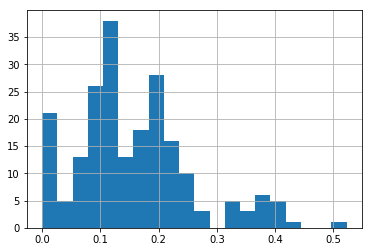

In [56]:
attData2.utilizationMean.hist(bins=20)
plt.show()

In [57]:
attData1.utilizationMean.std()

0.09389450219437284

In [58]:
attData2.utilizationMean.std()

0.09860096805682292

In [59]:
attData1[attData1['Label'] == 'Low'].shape

(209, 16)

In [60]:
attData2[attData2['Label'] == 'Low'].shape

(160, 16)

In [61]:
attData1.location.unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [62]:
attData2.location.unique()

array([1, 2, 3, 4, 5, 7, 8], dtype=int64)

In [63]:
attData2.isDesktop.unique()

array([1], dtype=int64)

In [64]:
attData2.iloc[:, [4,5,6,7,8,9,10,11,12,13]].head()

,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea
computerName,,,,,,,,,,
BL001,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
BL002,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
CITI001,1,2,1,1,1.0,0.0,1.0,0.0,0.0,0.0
CITI002,1,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0
CITI003,1,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

C:\Users\patricia\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Running models on original data

### Decision Tree Model

In [66]:
# X is the computer attributes
# Y is the outcome variable, Setting this as High or Low 

X = attData1.values[:, [3,4,5,6,7,8,9,10,11,12,13]]
Y = attData1.values[:, [15]]

In [67]:
# split data into training and test sets 70/30

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [68]:
# Decision tree classifier with criterion gini index

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [69]:
# Decision tree classifier with criterion information gain

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [70]:
#X_test[0]

In [71]:
# Try to predict using test set first record

#clf_gini.predict([[1, 1, 3, 0, 1, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]])

In [72]:
#Prediction for Decision Tree classifier with criterion gini index

y_pred = clf_gini.predict(X_test)
y_pred

array(['Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low'], dtype=object)

In [73]:
#Prediction for Decision Tree classifier with criterion as information gain

y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low'], dtype=object)

In [74]:
# Accuracy Score for the Decision Tree classifier with criterion as gini index

print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Accuracy is  71.4285714286


In [75]:
# Accuracy Score for the Decision Tree classifier with criterion as information gain

print "Accuracy is ", accuracy_score(y_test,y_pred_en)*100

Accuracy is  72.619047619


### Random Forest Model

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [77]:
clf = RandomForestClassifier()
trained_model = clf.fit(X_train, y_train)
print "Trained model : ", trained_model

predictions = trained_model.predict(X_test)
 
for i in xrange(0, 5):
    print "Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test)[i], predictions[i])

Trained model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Actual outcome :: ['Low'] and Predicted outcome :: Low
Actual outcome :: ['High'] and Predicted outcome :: Low
Actual outcome :: ['High'] and Predicted outcome :: High
Actual outcome :: ['Low'] and Predicted outcome :: Low
Actual outcome :: ['Low'] and Predicted outcome :: Low


C:\Users\patricia\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [78]:
print "Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train))*100
print "Test Accuracy  :: ", accuracy_score(y_test, predictions)*100
 

Train Accuracy ::  85.0515463918
Test Accuracy  ::  73.8095238095


In [79]:
print "Confusion matrix \n", confusion_matrix(y_test, predictions)

Confusion matrix 
[[ 7 21]
 [ 1 55]]


## Running models on data without laptops, possibly other skewed data

### Decision Tree Model 2

In [80]:
# X is the computer attributes
# Y is the outcome variable, Setting this as High or Low 

W = attData1.values[:, [4,5,6,7,8,9,10,11,12,13]]
Z = attData1.values[:, [15]]

In [81]:
# split data into training and test sets 70/30

W_train, W_test, z_train, z_test = train_test_split( W, Z, test_size = 0.3, random_state = 100)

In [82]:
# Decision tree classifier with criterion gini index

clf_gini2 = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini2.fit(W_train, z_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [83]:
# Decision tree classifier with criterion information gain

clf_entropy2 = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy2.fit(W_train, z_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [84]:
#Prediction for Decision Tree classifier with criterion gini index

z_pred = clf_gini2.predict(W_test)
z_pred

array(['Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low'], dtype=object)

In [85]:
#Prediction for Decision Tree classifier with criterion as information gain

z_pred_en = clf_entropy2.predict(W_test)
z_pred_en

array(['Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low'], dtype=object)

In [86]:
# Accuracy Score for the Decision Tree classifier with criterion as gini index

print "Accuracy is ", accuracy_score(z_test,z_pred)*100

Accuracy is  71.4285714286


In [87]:
# Accuracy Score for the Decision Tree classifier with criterion as information gain

print "Accuracy is ", accuracy_score(z_test,z_pred_en)*100

Accuracy is  72.619047619


### Random Forest Model 2

In [88]:
clf2 = RandomForestClassifier()
trained_model2 = clf2.fit(W_train, z_train)
print "Trained model : ", trained_model2

predictions2 = trained_model2.predict(W_test)
 
for i in xrange(0, 5):
    print "Actual outcome :: {} and Predicted outcome :: {}".format(list(z_test)[i], predictions2[i])

Trained model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Actual outcome :: ['Low'] and Predicted outcome :: Low
Actual outcome :: ['High'] and Predicted outcome :: Low
Actual outcome :: ['High'] and Predicted outcome :: High
Actual outcome :: ['Low'] and Predicted outcome :: Low
Actual outcome :: ['Low'] and Predicted outcome :: Low


C:\Users\patricia\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [89]:
print "Train Accuracy :: ", accuracy_score(z_train, trained_model2.predict(W_train))*100
print "Test Accuracy  :: ", accuracy_score(z_test, predictions2)*100
 

Train Accuracy ::  85.0515463918
Test Accuracy  ::  72.619047619


In [90]:
print "Confusion matrix \n", confusion_matrix(z_test, predictions2)

Confusion matrix 
[[ 8 20]
 [ 3 53]]


# Random forest model 2 is our best model so far. Handed an array of attributes indicating monitor size and number, location, and available hours among others, we can predict with 72% accuracy whether the machine will be a high-usage machine or a low-usage machine